In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

## 绘制两曲线对比图

In [9]:
def curve_comparison_two(path_1, path_2, x_1, y_1, x_2, y_2, name_figure):
    # 检查文件路径是否存在
    if not os.path.exists(path_1):
        print(f"Error: The file '{path_1}' does not exist.")
    if not os.path.exists(path_2):
        print(f"Error: The file '{path_2}' does not exist.")

    # 读取数据
    data_1 = pd.read_csv(path_1)
    data_2 = pd.read_csv(path_2)

    # 获取标题行
    title_1 = data_1.columns
    title_2 = data_2.columns

    print("Data 1 titles:", title_1)
    print("Data 2 titles:", title_2)

    # 提取数据列
    data_x_1 = data_1.iloc[:, x_1]
    data_y_1 = data_1.iloc[:, y_1]
    data_x_2 = data_2.iloc[:, x_2]
    data_y_2 = data_2.iloc[:, y_2]

    # 检查数据列是否正确读取
    print("x_1 head:", data_x_1.head())
    print("y_1 head:", data_y_1.head())
    print("x_2 head:", data_x_2.head())
    print("y_2 head:", data_y_2.head())

    # Function to plot curve group ********************************************************************************
    file_directory = os.getcwd() + "/Curve Group"
    line_width = 4
    if not os.path.exists(file_directory):
        os.makedirs(file_directory)

    with plt.rc_context(
            {'font.family': 'serif', 'font.serif': ['Times New Roman'], 'font.weight': 'bold', 'font.size': 32}):
        fig, ax = plt.subplots(figsize=(12, 9), dpi=100)
        ax.spines['top'].set_linewidth(3)
        ax.spines['bottom'].set_linewidth(3)
        ax.spines['left'].set_linewidth(3)
        ax.spines['right'].set_linewidth(3)
        plt.tick_params(axis='both', direction='in', width=3, which='both', pad=10)  # 设置刻度朝内，边框厚度为 2

        plt.plot(data_x_1, data_y_1, label=fr'Without GBDF2', linewidth=3, color='blue')
        plt.plot(data_x_2, data_y_2, label=fr'With GBDF2', linewidth=3, color='red')

        offset = ax.yaxis.get_offset_text()
        transform = offset.get_transform()
        offset.set_transform(transform + plt.matplotlib.transforms.ScaledTranslation(0, 5 / 72., fig.dpi_scale_trans))
        plt.title(f'{name_figure}', pad=20, fontweight='bold')
        plt.xlabel(f'{title_1[x_1]}', fontweight='bold')
        plt.ylabel(f'{title_1[y_1]}', fontweight='bold')
        plt.tight_layout()
        plt.legend(fontsize='small')
        plt.savefig(file_directory + f'/{name_figure}.png', dpi=100, bbox_inches='tight')
        plt.show()

Data 1 titles: Index(['Time', 'Total Free Energy', 'Shrinkage', 'Radius Neck',
       'Normalized Time', 'Normalized Shrinkage', 'Normalized Neck Length'],
      dtype='object')
Data 2 titles: Index(['Time', 'Total Free Energy', 'Shrinkage', 'Radius Neck',
       'Normalized Time', 'Normalized Shrinkage', 'Normalized Neck Length'],
      dtype='object')
x_1 head: 0    1.000000e-15
1    5.000000e-03
2    1.000000e-02
3    1.500000e-02
4    2.000000e-02
Name: Normalized Time, dtype: float64
y_1 head: 0    10655.517596
1    10612.110157
2    10571.513404
3    10534.318016
4    10497.964039
Name: Total Free Energy, dtype: float64
x_2 head: 0    1.000000e-15
1    5.000000e-03
2    1.000000e-02
3    1.500000e-02
4    2.000000e-02
Name: Normalized Time, dtype: float64
y_2 head: 0    10655.517596
1    10612.110157
2    10571.513404
3    10532.876982
4    10508.133356
Name: Total Free Energy, dtype: float64


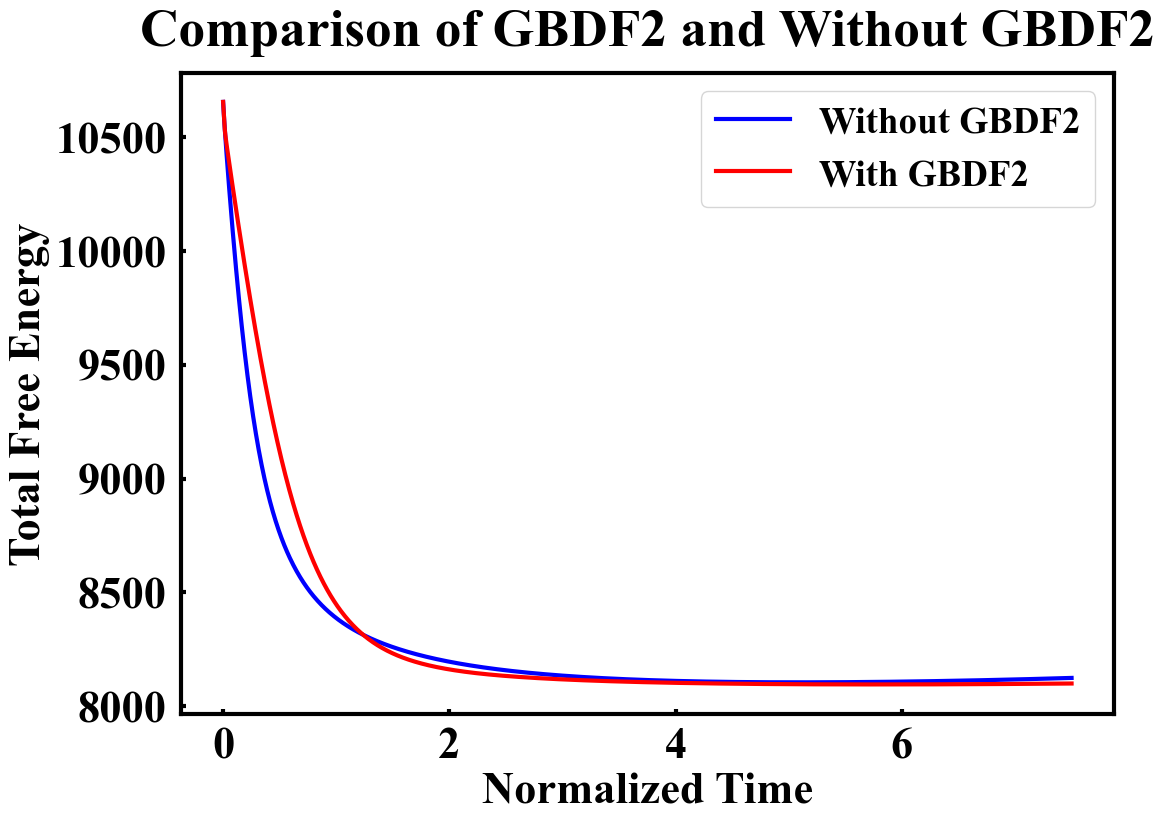

In [10]:
data_1_path = os.getcwd() + "/PolyParticle_Viscosity_Simulation/Test-1 (June 30, 2024, 19-33-25)/Data/various_data.csv"
data_2_path = os.getcwd() + "/PolyParticle_Viscosity_Simulation_GBDF2/Test-1 (July 02, 2024, 20-32-57)/Data/various_data.csv"
curve_comparison_two(data_1_path, data_2_path, 4, 1, 4, 1, "Comparison of GBDF2 and Without GBDF2")
